In [1]:
# Set up
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tqdm
import spectral
from sklearn.cluster import KMeans, MiniBatchKMeans

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


# 1. Load data <br/>
Link: http://apex.vgt.vito.be/content/free-data-cubes?fbclid=IwAR1yKu7SKlNokPOSOY4fXDrQg1Di-8X6FiA9j8_kBKlWbcciK5au9n0vRaI

In [2]:
img = spectral.open_image(
    'APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube.hdr'
)
data = img.load()
X = data.reshape(-1, data.shape[-1])
X_std = (X - X.mean()) / X.std()
X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))

In [3]:
def show_results(model):
    '''
    Use given model to break down the spectral photo
    into layers
    '''
    Y = model.labels_.reshape(data.shape[0], data.shape[1]).astype(np.uint8)
    labels_no = np.unique(model.labels_).size
    table_width = 3
    table_hight = (labels_no + table_width - 1) // table_width
    
    fig, axes = plt.subplots(table_hight, table_width)
    fig.set_size_inches(15, table_hight * 5)
    for i in tqdm.tqdm(np.unique(model.labels_), desc='Plotting groups', position=0, leave=True):
        map_feature = np.zeros(Y.shape, dtype=np.uint8)
        map_feature[Y == i] = 1
        row, col = i // table_width, i % table_width
        
        if table_hight == 1:
            axes[col].imshow(map_feature, cmap='summer')
            axes[col].set_title(f'Group: {i}')
        else:
            axes[row][col].imshow(map_feature, cmap='summer')
            axes[row][col].set_title(f'Group: {i}')
        
    plt.figure(figsize=(15, 10))
    plt.title('All groups')
    plt.imshow(Y, cmap='gist_earth')

Plotting groups: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 66.80it/s]


Wall time: 6.87 s


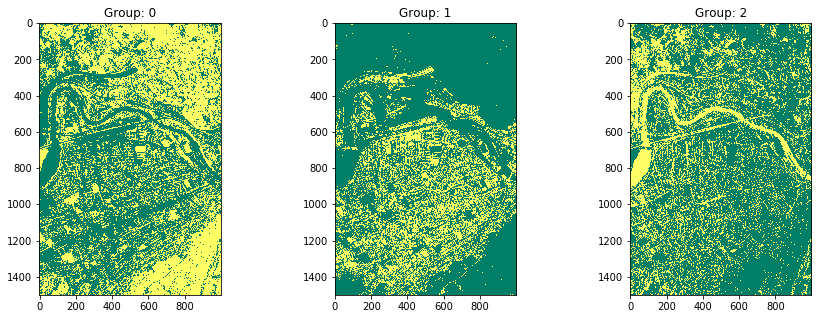

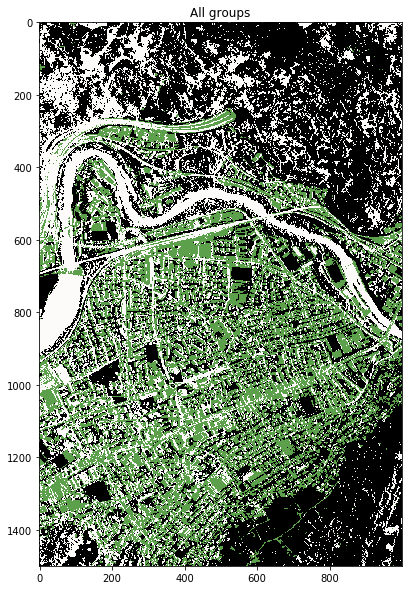

In [9]:
%%time
# Breaking the photo into 3 layers
model = MiniBatchKMeans(n_clusters=3, n_init=10)
model.fit(X)
show_results(model)

Plotting groups: 100%|█████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 77.62it/s]


Wall time: 8.71 s


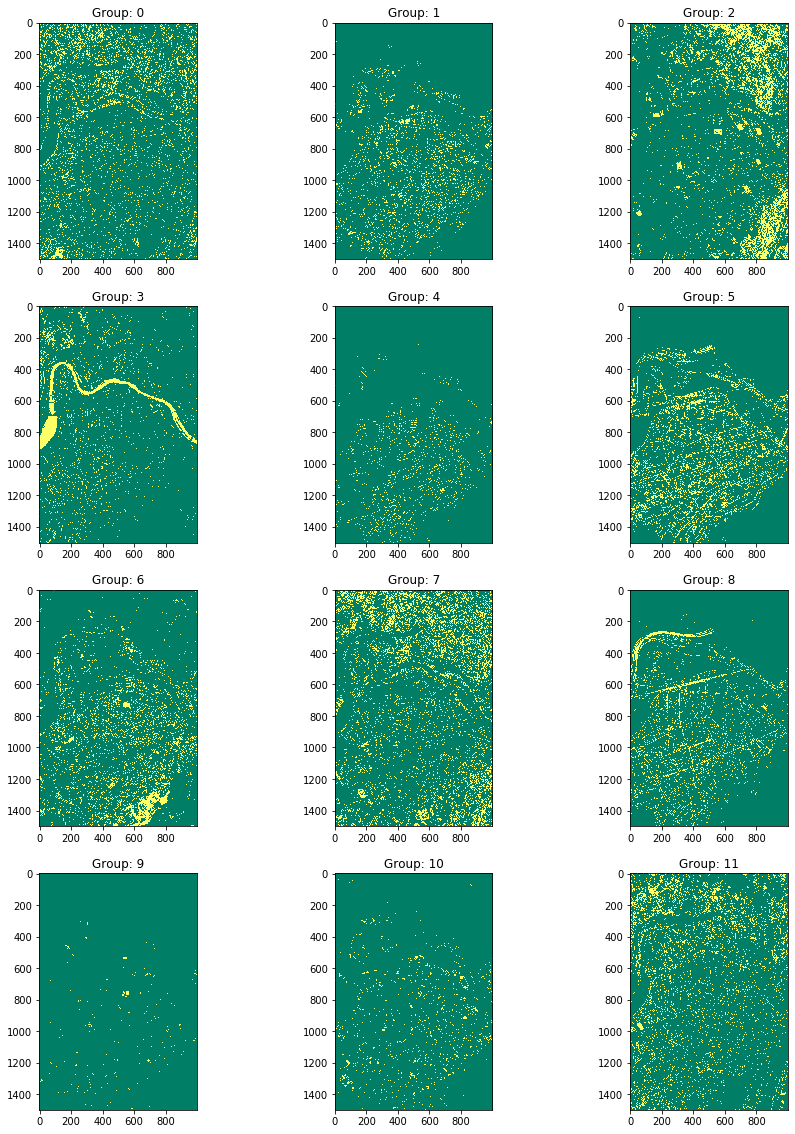

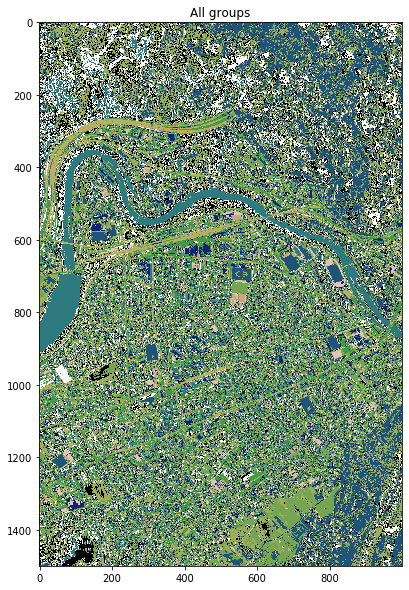

In [10]:
%%time
# Breaking the photo into 12 layers
model = MiniBatchKMeans(n_clusters=12, n_init=10)
model.fit(X)
show_results(model)

Plotting groups: 100%|███████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 56.74it/s]


Wall time: 5min 14s


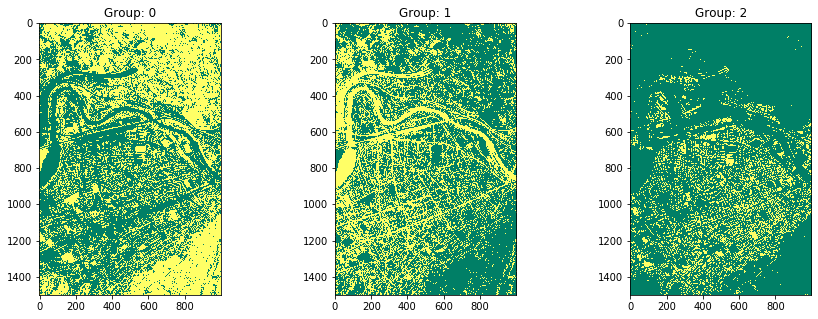

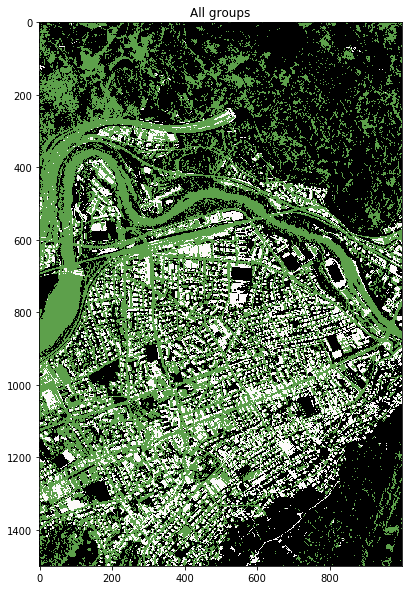

In [5]:
%%time
# Using regular KMeans takes much longer
model = KMeans(n_clusters=3, n_init=10)
model.fit(X)
show_results(model)